In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# dataloader
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

In [3]:
training_epochs = 1000
batch_size = 256
display_step = 50
learning_rate = 0.01
#reshape data
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# create weight bias

In [5]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [6]:
#model
def logistic_regression(x):
  return tf.nn.softmax(tf.matmul(x, W) + b)
#loss
def cross_entropy(y_pred, y_true):
  y_true = tf.one_hot(y_true, depth = 10)
  y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
  return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [7]:

def accuracy(y_pred, y_true):
  prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(prediction, tf.float32))

In [8]:
optimizer = tf.optimizers.SGD(learning_rate)
print ("Graph READY")

Graph READY


In [9]:
def run_optimization(x, y):
  with tf.GradientTape() as g:
    pred = logistic_regression(x)
    loss = cross_entropy(pred, y)

  # Compute gradients.
  gradients = g.gradient(loss, [W, b])
  
  # Update W and b following gradients.
  optimizer.apply_gradients(zip(gradients, [W, b]))

In [13]:
loss_g=[]
for step, (batch_x, batch_y) in enumerate(train_data.take(training_epochs), 1):
  
  run_optimization(batch_x, batch_y)
  
  if step % display_step == 0:
    pred = logistic_regression(batch_x)
    loss = cross_entropy(pred, batch_y)

    acc = accuracy(pred, batch_y)

    print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
    loss_g.append(loss)

step: 50, loss: 94.577728, accuracy: 0.875000
step: 100, loss: 54.803581, accuracy: 0.937500
step: 150, loss: 63.728432, accuracy: 0.906250
step: 200, loss: 28.179756, accuracy: 0.976562
step: 250, loss: 47.746807, accuracy: 0.945312
step: 300, loss: 125.631447, accuracy: 0.910156
step: 350, loss: 57.095230, accuracy: 0.925781
step: 400, loss: 96.910995, accuracy: 0.898438
step: 450, loss: 63.424324, accuracy: 0.941406
step: 500, loss: 209.468567, accuracy: 0.839844
step: 550, loss: 96.544296, accuracy: 0.867188
step: 600, loss: 70.060211, accuracy: 0.925781
step: 650, loss: 81.417297, accuracy: 0.925781
step: 700, loss: 73.070923, accuracy: 0.910156
step: 750, loss: 65.039436, accuracy: 0.929688
step: 800, loss: 115.826103, accuracy: 0.898438
step: 850, loss: 72.257584, accuracy: 0.910156
step: 900, loss: 58.899296, accuracy: 0.949219
step: 950, loss: 57.435478, accuracy: 0.921875
step: 1000, loss: 90.430702, accuracy: 0.906250


In [11]:
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.907000


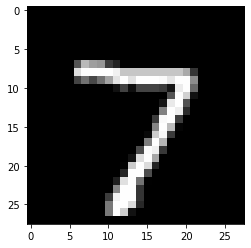

Model prediction: 7


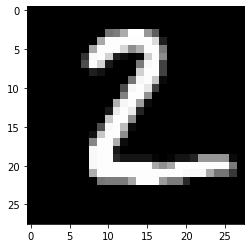

Model prediction: 2


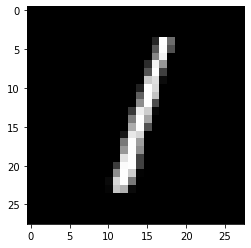

Model prediction: 1


In [12]:
n_images = 3
test_images = x_test[:n_images]
prediction = logistic_regression(test_images)

# visualization
for i in range(n_images):
  plt.imshow(np.reshape(test_images[i], [28, 28]), cmap = 'gray')
  plt.show()
  print("Model prediction: %i" % np.argmax(prediction.numpy()[i]))

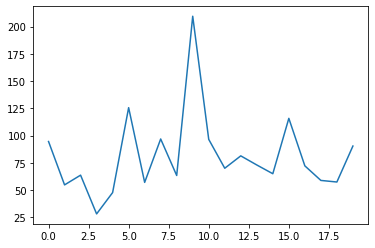

In [15]:
plt.plot(loss_g)